In [409]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

from sklearn import preprocessing

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

from scipy import stats

from collections import Counter

In [410]:
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

In [411]:
df = pd.read_csv('train.csv')

In [412]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [414]:
df.shape

(103904, 25)

In [415]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# Categorical Variables

In [416]:
def make_bars(data, name):
    data.plot(kind="bar")
    plt.title("Value counts of {}".format(name))
    plt.xlabel("satisfaction")
    plt.ylabel("Count")
    plt.show()

In [417]:
df['satisfaction'].value_counts(normalize = True)

neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: satisfaction, dtype: float64

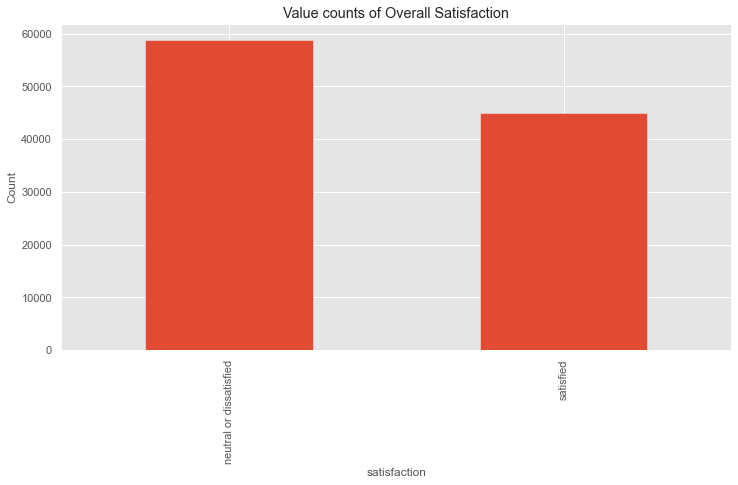

In [418]:
make_bars(df['satisfaction'].value_counts(), 'Overall Satisfaction')

In [419]:
df['Inflight wifi service'].value_counts(normalize = True)

3    0.248961
2    0.248595
4    0.190503
1    0.171697
5    0.110381
0    0.029864
Name: Inflight wifi service, dtype: float64

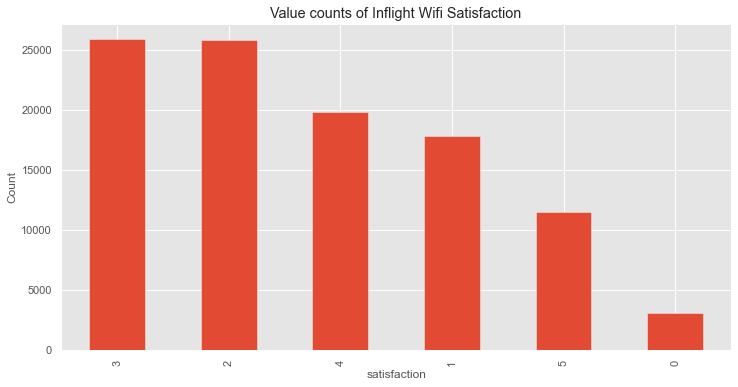

In [420]:
make_bars(df['Inflight wifi service'].value_counts().plot(kind="bar"), 'Inflight Wifi Satisfaction')

In [421]:
df['Departure/Arrival time convenient'].value_counts(normalize = True)

4    0.245862
5    0.215612
3    0.172910
2    0.165451
1    0.149157
0    0.051009
Name: Departure/Arrival time convenient, dtype: float64

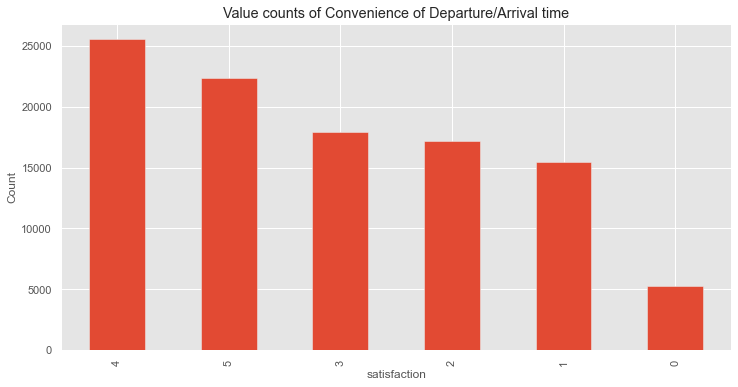

In [422]:
make_bars(df['Departure/Arrival time convenient'].value_counts(), 'Convenience of Departure/Arrival time')

In [423]:
df['Ease of Online booking'].value_counts(normalize = True)

3    0.235304
2    0.231185
4    0.188357
1    0.168665
5    0.133306
0    0.043184
Name: Ease of Online booking, dtype: float64

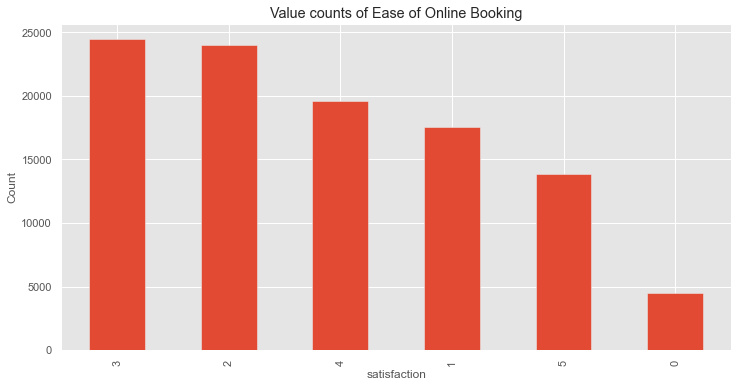

In [424]:
make_bars(df['Ease of Online booking'].value_counts(), 'Ease of Online Booking')

In [425]:
df['Gate location'].value_counts(normalize = True)

3    0.275033
4    0.235082
2    0.187279
1    0.169021
5    0.133575
0    0.000010
Name: Gate location, dtype: float64

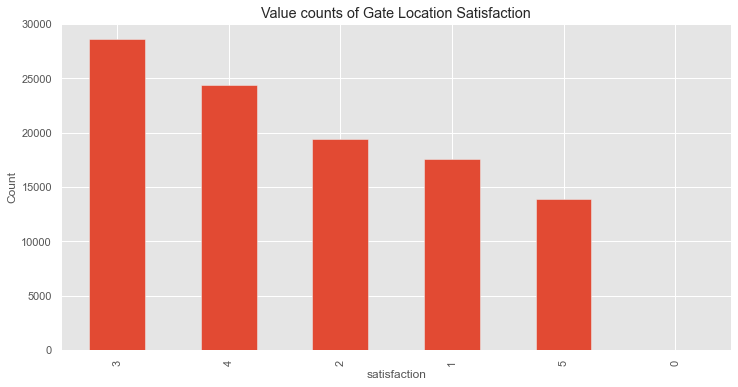

In [426]:
make_bars(df['Gate location'].value_counts(), 'Gate Location Satisfaction')

In [427]:
df['Food and drink'].value_counts(normalize = True)

4    0.234438
5    0.214746
3    0.214621
2    0.211618
1    0.123547
0    0.001030
Name: Food and drink, dtype: float64

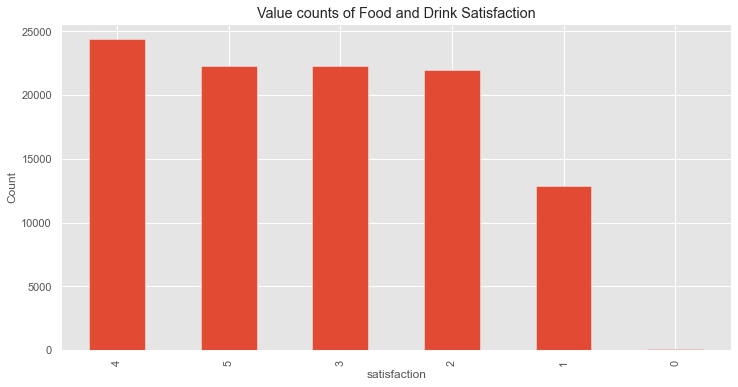

In [428]:
make_bars(df['Food and drink'].value_counts(), 'Food and Drink Satisfaction')

In [429]:
df['Online boarding'].value_counts(normalize = True)

4    0.296062
3    0.209848
5    0.199347
2    0.168473
1    0.102903
0    0.023368
Name: Online boarding, dtype: float64

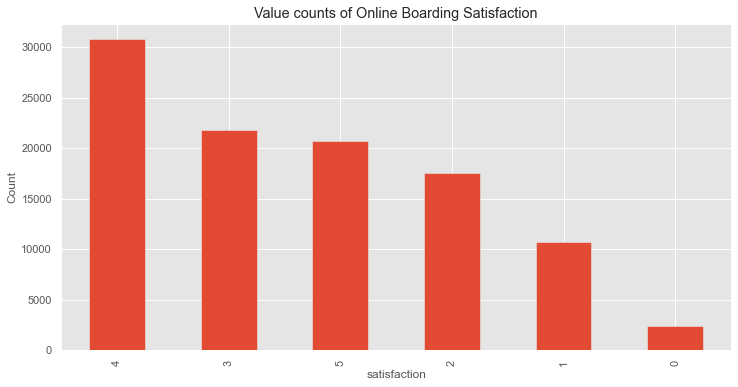

In [430]:
make_bars(df['Online boarding'].value_counts(), 'Online Boarding Satisfaction')

In [431]:
df['Seat comfort'].value_counts(normalize = True)

4    0.305715
5    0.254754
3    0.179935
2    0.143373
1    0.116213
0    0.000010
Name: Seat comfort, dtype: float64

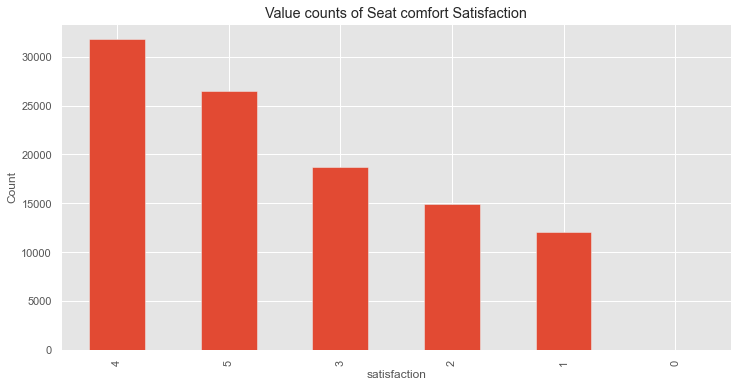

In [432]:
make_bars(df['Seat comfort'].value_counts(), 'Seat comfort Satisfaction')

In [433]:
df['Inflight entertainment'].value_counts(normalize = True)

4    0.283175
5    0.242657
3    0.184199
2    0.169743
1    0.120092
0    0.000135
Name: Inflight entertainment, dtype: float64

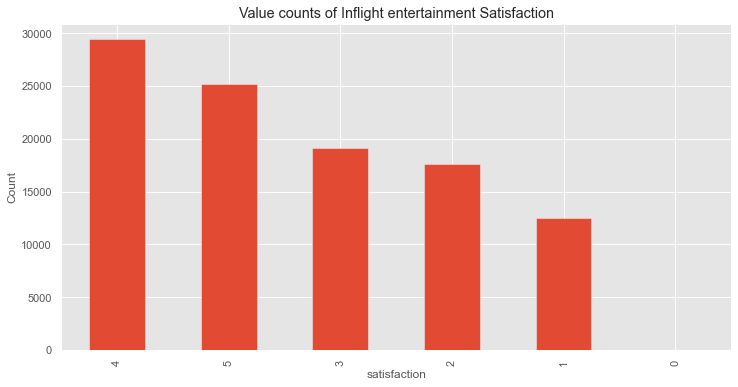

In [434]:
make_bars(df['Inflight entertainment'].value_counts(), 'Inflight entertainment Satisfaction')

In [435]:
df['On-board service'].value_counts(normalize = True)

4    0.297072
5    0.227595
3    0.219751
2    0.141294
1    0.114259
0    0.000029
Name: On-board service, dtype: float64

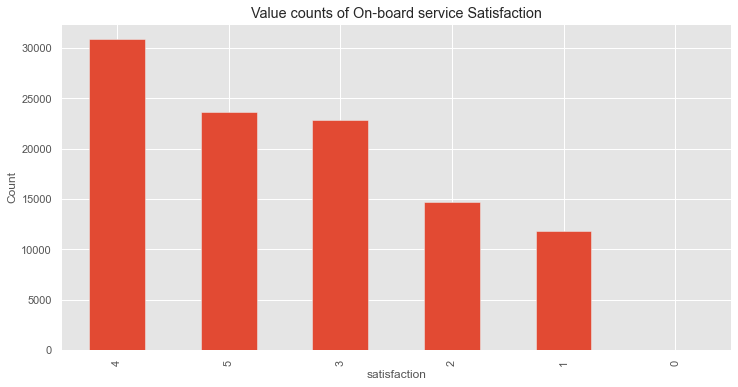

In [436]:
make_bars(df['On-board service'].value_counts(), 'On-board service Satisfaction')

In [437]:
df['Leg room service'].value_counts(normalize = True)

4    0.277073
5    0.237402
3    0.193429
2    0.187914
1    0.099640
0    0.004543
Name: Leg room service, dtype: float64

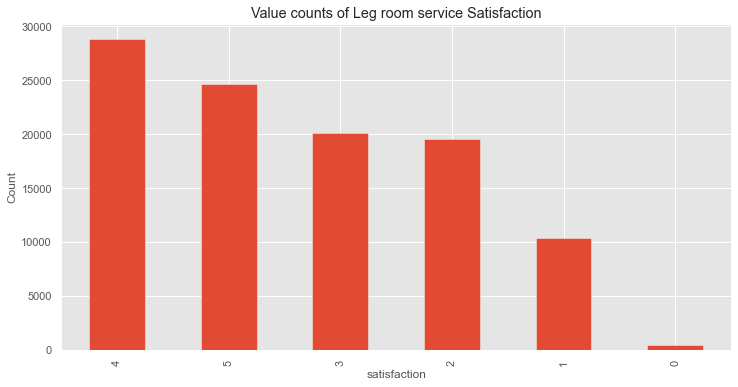

In [438]:
make_bars(df['Leg room service'].value_counts(), 'Leg room service Satisfaction')

In [439]:
df['Baggage handling'].value_counts(normalize = True)

4    0.359784
5    0.261116
3    0.198568
2    0.110881
1    0.069651
Name: Baggage handling, dtype: float64

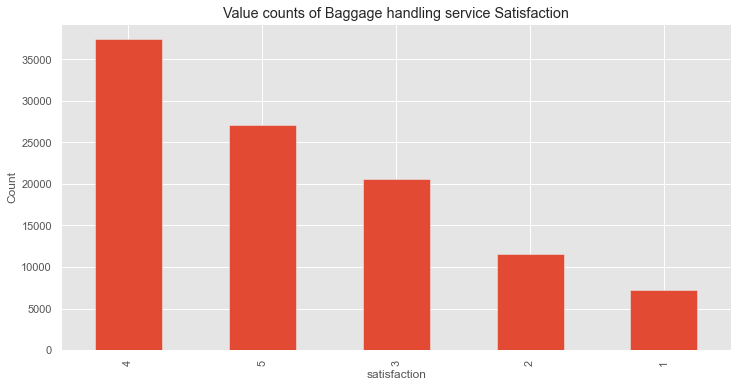

In [440]:
make_bars(df['Baggage handling'].value_counts(), 'Baggage handling service Satisfaction')

In [441]:
df['Checkin service'].value_counts(normalize = True)

4    0.279633
3    0.273772
5    0.198443
2    0.124086
1    0.124057
0    0.000010
Name: Checkin service, dtype: float64

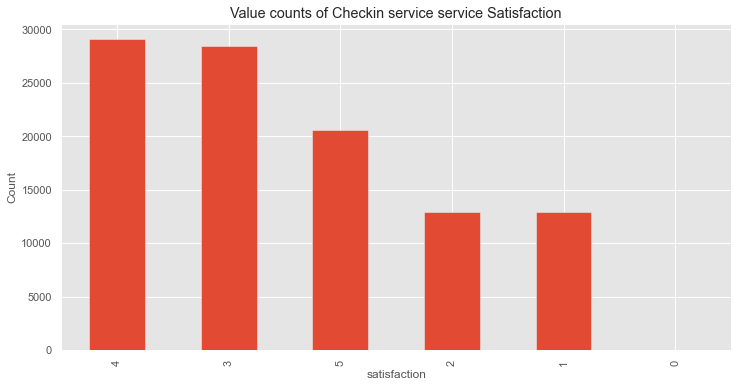

In [442]:
make_bars(df['Checkin service'].value_counts(), 'Checkin service service Satisfaction')

In [443]:
df['Inflight service'].value_counts(normalize = True)

4    0.365193
5    0.260972
3    0.195363
2    0.110265
1    0.068178
0    0.000029
Name: Inflight service, dtype: float64

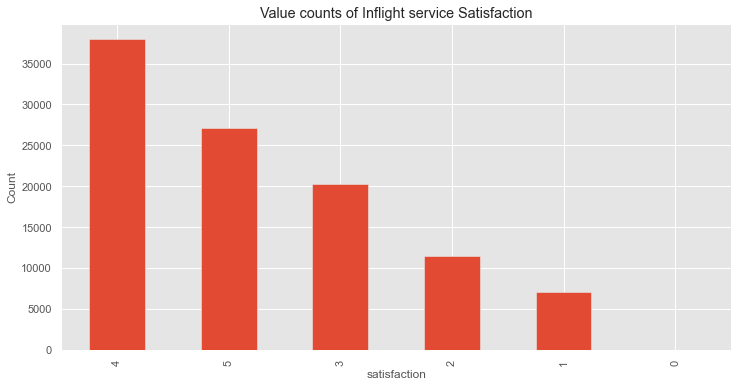

In [444]:
make_bars(df['Inflight service'].value_counts(), 'Inflight service Satisfaction')

In [445]:
df['Cleanliness'].value_counts(normalize = True)

4    0.261578
3    0.236507
5    0.218365
2    0.155259
1    0.128176
0    0.000115
Name: Cleanliness, dtype: float64

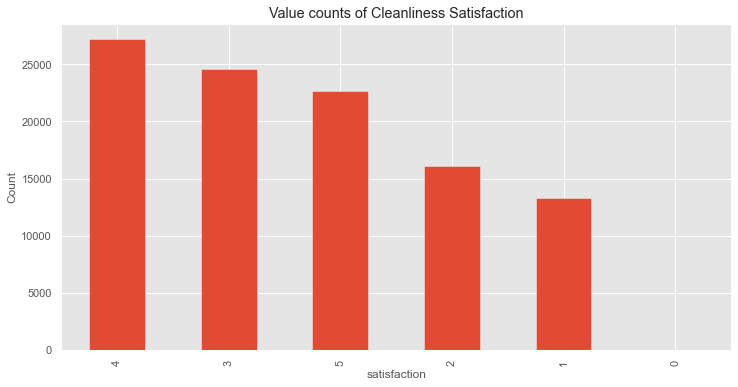

In [446]:
make_bars(df['Cleanliness'].value_counts(), 'Cleanliness Satisfaction')

# Numeric Variables

In [447]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [448]:
df['Age'].describe()

count    103904.000000
mean         39.379706
std          15.114964
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64

<AxesSubplot:>

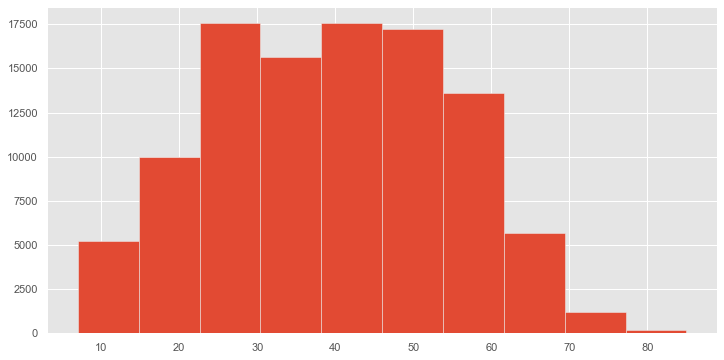

In [449]:
df['Age'].hist()

In [450]:
print(f"Skewness: {df['Age'].skew()}")
print(f"Kurtosis: {df['Age'].kurt()}")

Skewness: -0.0045161270723468785
Kurtosis: -0.7195681169472721


In [451]:
df['Flight Distance'].describe()

count    103904.000000
mean       1189.448375
std         997.147281
min          31.000000
25%         414.000000
50%         843.000000
75%        1743.000000
max        4983.000000
Name: Flight Distance, dtype: float64

<AxesSubplot:>

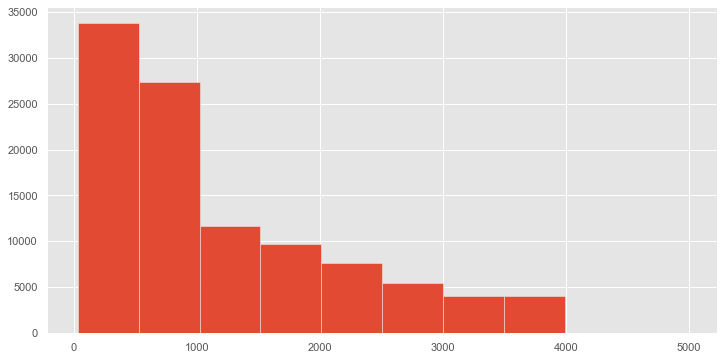

In [452]:
df['Flight Distance'].hist()

In [453]:
print(f"Skewness: {df['Flight Distance'].skew()}")
print(f"Kurtosis: {df['Flight Distance'].kurt()}")

Skewness: 1.1094656676620138
Kurtosis: 0.26853543952132286


In [454]:
df['Departure Delay in Minutes'].describe()

count    103904.000000
mean         14.815618
std          38.230901
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay in Minutes, dtype: float64

<AxesSubplot:>

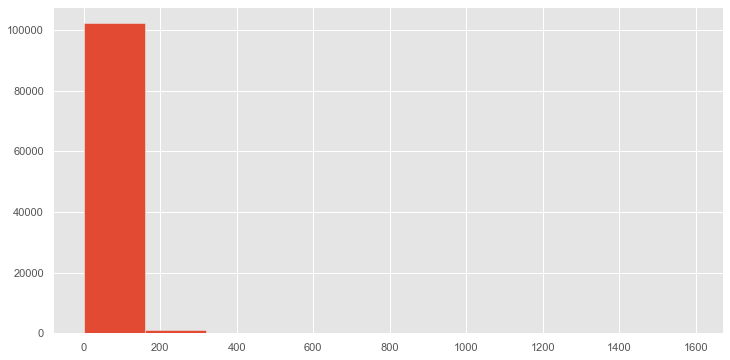

In [455]:
df['Departure Delay in Minutes'].hist()

In [456]:
print(f"Skewness: {df['Departure Delay in Minutes'].skew()}")
print(f"Kurtosis: {df['Departure Delay in Minutes'].kurt()}")

Skewness: 6.733979510212754
Kurtosis: 100.26700578178024


In [457]:
df['Arrival Delay in Minutes'].describe()

count    103594.000000
mean         15.178678
std          38.698682
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

<AxesSubplot:>

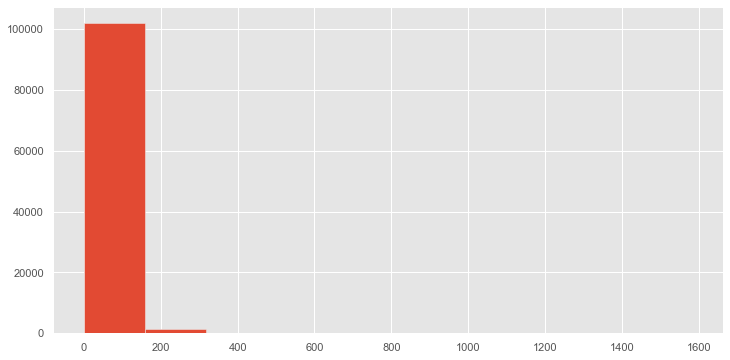

In [458]:
df['Arrival Delay in Minutes'].hist()

In [459]:
print(f"Skewness: {df['Arrival Delay in Minutes'].skew()}")
print(f"Kurtosis: {df['Arrival Delay in Minutes'].kurt()}")

Skewness: 6.596636807462696
Kurtosis: 94.53700550306654


# Feature Relationships

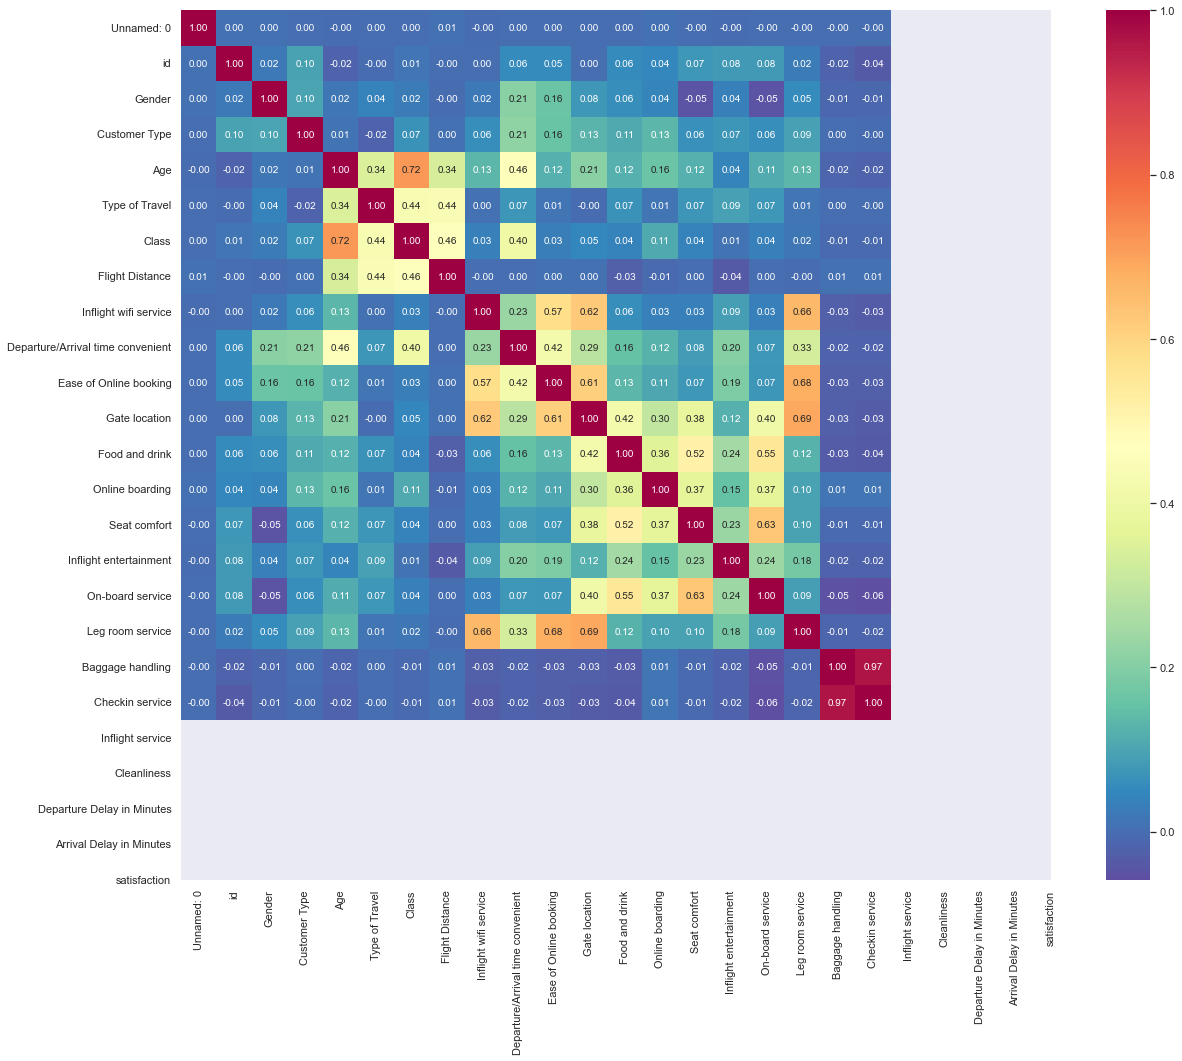

In [460]:
sns.set(rc={'figure.figsize':(20,16)})
hm = sns.heatmap(df.corr(), 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="Spectral_r")
plt.show()

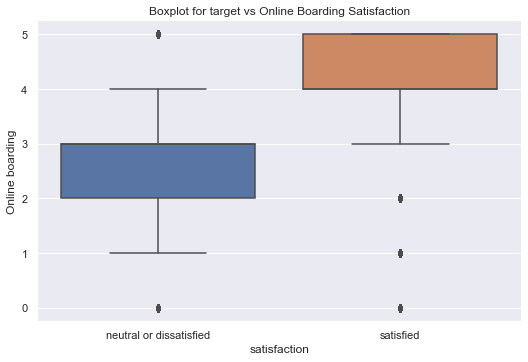

In [461]:
sns.catplot(x="satisfaction", y="Online boarding", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for target vs Online Boarding Satisfaction")
plt.show()

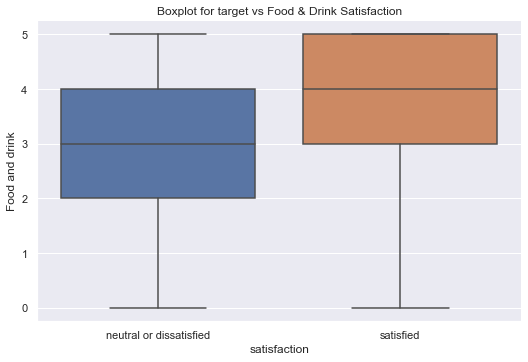

In [462]:
sns.catplot(x="satisfaction", y="Food and drink", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for target vs Food & Drink Satisfaction")
plt.show()

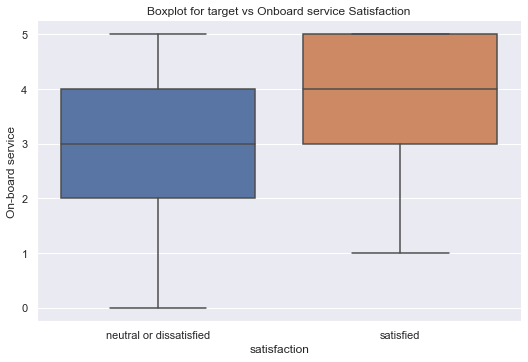

In [463]:
sns.catplot(x="satisfaction", y="On-board service", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for target vs Onboard service Satisfaction")
plt.show()

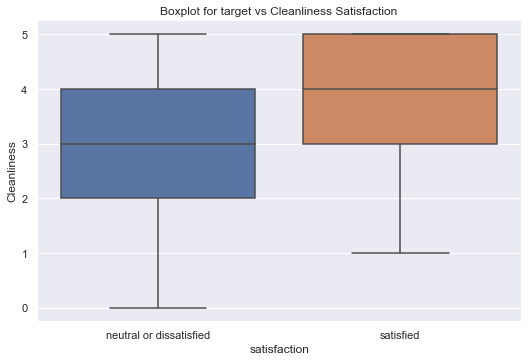

In [464]:
sns.catplot(x="satisfaction", y="Cleanliness", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for target vs Cleanliness Satisfaction")
plt.show()

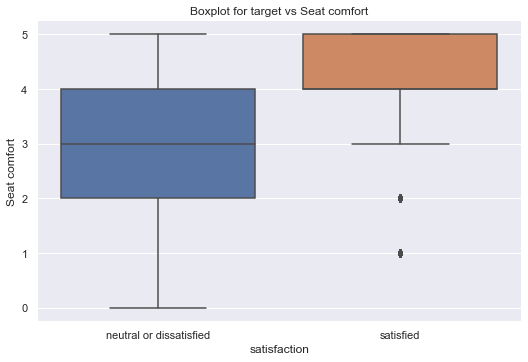

In [465]:
sns.catplot(x="satisfaction", y="Seat comfort", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for target vs Seat comfort")
plt.show()

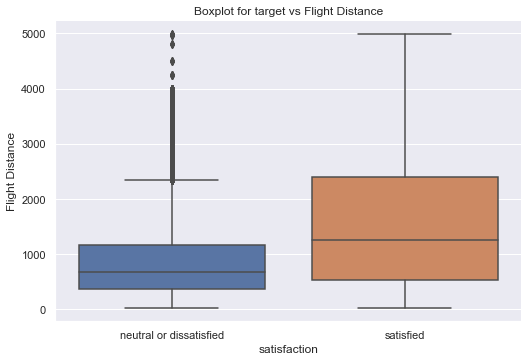

In [466]:
sns.catplot(x="satisfaction", y="Flight Distance", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for target vs Flight Distance")
plt.show()

# Model Building

In [467]:
df = pd.get_dummies(df,columns=['Gender', "Customer Type","Type of Travel", 'Class'])
df=df[df['Arrival Delay in Minutes'].isna() == False]

In [468]:
y = df['satisfaction']
X= df.drop(['satisfaction', 'id', 'Unnamed: 0'], axis=1)
X_scaled = pd.DataFrame(preprocessing.scale(X), columns = list(X.columns))

In [469]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.3, random_state=42)

In [374]:
param_dist = {"n_estimators": randint(1,100),
              "max_depth": randint(1, 9),
              "max_features": randint(1, 13),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

tree = RandomForestClassifier()

tree_cv = RandomizedSearchCV(tree, param_dist, cv=5, n_iter=100)

tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 10, 'min_samples_leaf': 8, 'n_estimators': 97}
Best score is 0.9431565882920776


In [392]:
rf= RandomForestClassifier(criterion='entropy', max_depth= 8, max_features=10, min_samples_leaf= 8, n_estimators= 97)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.4313134824083729


In [393]:
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

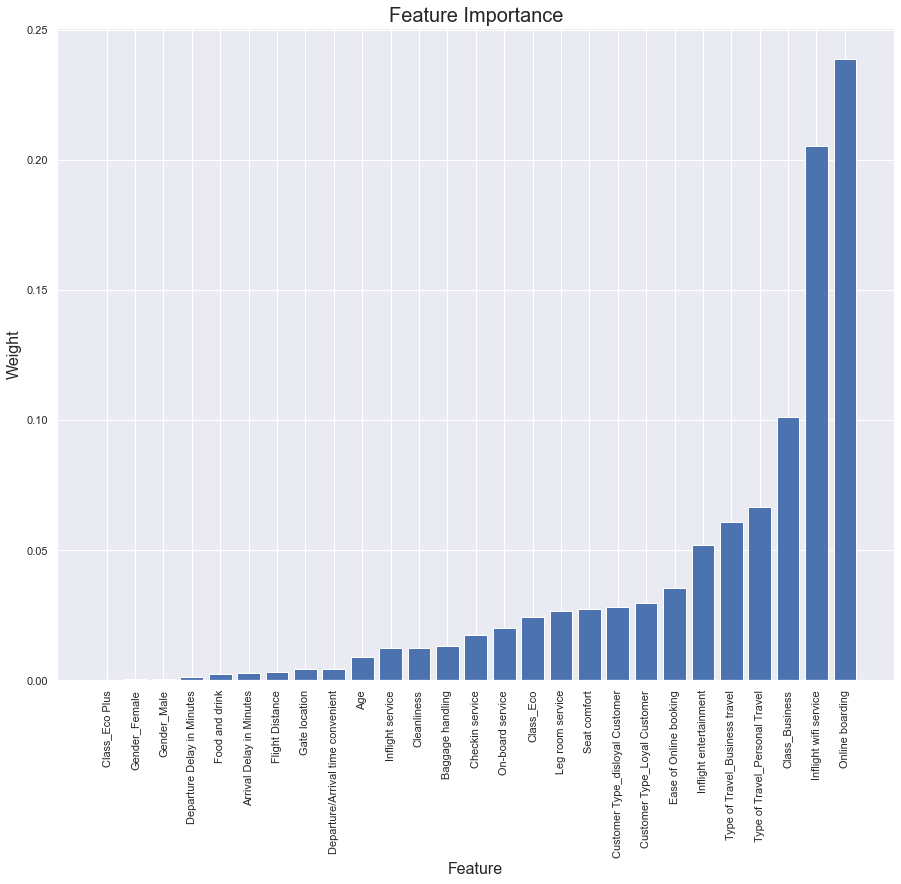

In [394]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.bar(list(importances_sorted.keys()), list(importances_sorted.values))
fig.set_size_inches([15, 12])
plt.xticks(rotation = 90)
ax.set_title("Feature Importance", fontsize = 20)
ax.set_xlabel('Feature', fontsize=16)
ax.set_ylabel('Weight', fontsize=16)
plt.show()

In [489]:
test = pd.read_csv('test.csv')

In [490]:
test = pd.get_dummies(test,columns=['Gender', "Customer Type","Type of Travel", 'Class'])
test=test[test['Arrival Delay in Minutes'].isna() == False]

In [491]:
y_test = test['satisfaction']
X_test= test.drop(['satisfaction', 'id', 'Unnamed: 0'], axis=1)
X_scaled = pd.DataFrame(preprocessing.scale(X_test), columns = list(X.columns))

In [492]:
y_pred = rf.predict(X_scaled)

print(accuracy_score(y_test, y_pred))

0.9434596222917391
